In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau
from sklearn.model_selection import train_test_split
import csv

Using TensorFlow backend.


In [2]:

def get_data(filename):

    with open(filename) as training_file:
      csv_reader = csv.reader(training_file, delimiter=',')
      first_line = True
      temp_labels= []
      temp_images = []

      for row in csv_reader:

        if first_line: 
          first_line = False
        else:
          temp_labels.append(row[0])
          image_data = row[1:785]
          image_array = np.array_split(image_data, 28) # Make 28 x 28
          temp_images.append(image_array)
        
      images = np.array(temp_images).astype('float')
      labels = np.array(temp_labels).astype('float')
    return images, labels
"""
def get_data2(filename):

    with open(filename) as training_file:
      csv_reader = csv.reader(training_file, delimiter=',')
      first_line = True
      temp_images = []

      for row in csv_reader:

        if first_line: 
          first_line = False
        else:
          image_data = row[0:784]
          image_array = np.array_split(image_data, 28) # Make 28 x 28
          temp_images.append(image_array)
        
      images = np.array(temp_images).astype('float')
    return images
"""
training_images, training_labels = get_data("train.csv")


print(training_images.shape)
print(training_labels.shape)



(42000, 28, 28)
(42000,)


In [3]:
training_images = np.expand_dims(training_images,axis=-1)


In [27]:
train_datagen = ImageDataGenerator(rescale = 1./255,   
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        shear_range=0.2,
        fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale= 1./255.)
    
# Keep These
print(training_images.shape)
#print(testing_images.shape)

(37800, 28, 28, 1)


In [28]:
model = tf.keras.models.Sequential([
    
        tf.keras.layers.Conv2D(64, (5,5), activation='relu', input_shape=(28, 28, 1)),    
        tf.keras.layers.Conv2D(64, (5,5), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),

        tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),    
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(10, activation='softmax') 
])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])


model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 24, 24, 64)        1664      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 20, 20, 64)        102464    
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 8, 8, 64)          36928     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 3, 3, 64)         

In [29]:
print(training_images.shape)
print(training_labels.shape)

(37800, 28, 28, 1)
(37800,)


In [30]:
training_images, testing_images, training_labels, testing_labels = train_test_split(training_images, training_labels, test_size = 0.1)

In [31]:
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

(34020, 28, 28, 1)
(34020,)
(3780, 28, 28, 1)
(3780,)


In [32]:
# Train the Model
history = model.fit_generator(train_datagen.flow(training_images, training_labels, batch_size=20),
                                                 epochs=10,
                                                validation_data=validation_datagen.flow(testing_images,testing_labels, batch_size=20),
                              validation_steps=len(testing_images) / 20)


Epoch 1/10
1701/1701 [==============================] - 202s 118ms/step - loss: 0.8257 - accuracy: 0.7297 - val_loss: 0.0903 - val_accuracy: 0.9765
Epoch 2/10
1701/1701 [==============================] - 204s 120ms/step - loss: 0.2986 - accuracy: 0.9173 - val_loss: 0.0856 - val_accuracy: 0.9807
Epoch 3/10
1701/1701 [==============================] - 203s 120ms/step - loss: 0.2726 - accuracy: 0.9301 - val_loss: 0.2691 - val_accuracy: 0.9730
Epoch 4/10
1701/1701 [==============================] - 203s 119ms/step - loss: 0.2851 - accuracy: 0.9308 - val_loss: 0.1376 - val_accuracy: 0.9778
Epoch 5/10
1701/1701 [==============================] - 204s 120ms/step - loss: 0.3025 - accuracy: 0.9285 - val_loss: 0.2232 - val_accuracy: 0.9780
Epoch 6/10
1701/1701 [==============================] - 197s 116ms/step - loss: 0.3280 - accuracy: 0.9259 - val_loss: 0.1944 - val_accuracy: 0.9791
Epoch 7/10
1701/1701 [==============================] - 202s 119ms/step - loss: 0.3498 - accuracy: 0.9218 - val_

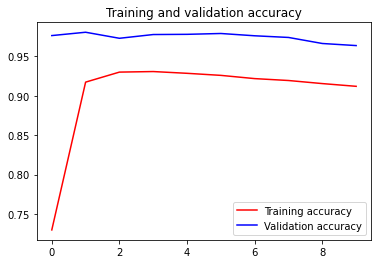

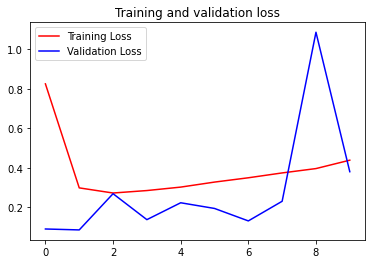

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [11]:
test = pd.read_csv("test.csv")
test = test / 255.0
print(test.shape)
test = test.values.reshape(-1,28,28,1)
print(test.shape)

In [34]:
results = model.predict(test)
results.shape

(28000, 10)

In [35]:
from numpy import savetxt
# save to csv file
savetxt('submission.csv', results, delimiter=',')

In [36]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")

In [37]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("cnn_mnist_datagen.csv",index=False)